# Initializatoin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/DL/HW3

In [72]:
# download utils folder to access it from google colab
!gdown 'https://drive.google.com/uc?export=download&id=1t-LPPmJc6gvK1-3t3g63MuU18lF3lln6' -q

## Imports

In [73]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.autograd import Variable
from torch.nn import Parameter

from name_dataset import Dataset

# RNN

## Traditional RNN

In the introductory section, we delve into the architecture of Recurrent Neural Networks (RNNs) and elucidate their training methodologies. To gain a deeper understanding of RNNs, you're encouraged to explore further [HERE](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-network)

For the task at hand, you've been furnished with the Names dataset, a compilation comprising thousands of surnames from 18 distinct languages of origin. Your objective is to prognosticate the language of origin for a given name, relying solely on its orthography. Your task primarily involves implementing the section demarcated by `#your_code`.

In [ ]:
dataset = Dataset()
for i in range(10):
    category, line, _, _ = dataset.randomTrainingExample()
    print('category =', category, '- random name =', line)

Error occurred while downloading data.zip: --2024-04-19 22:52:38--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.160.143.101, 18.160.143.107, 18.160.143.21, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.160.143.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

     0K .......... .......... .......... .......... ..........  1% 3.91M 1s
    50K .......... .......... .......... .......... ..........  3% 5.19M 1s
   100K .......... .......... .......... .......... ..........  5% 10.4M 0s
   150K .......... .......... .......... .......... ..........  7% 8.39M 0s
   200K .......... .......... .......... .......... ..........  8% 14.2M 0s
   250K .......... .......... .......... .......... .......... 10% 17.4M 0s
   300K .......... .......... .......... .......... .......... 12% 17.9M 0s
   350K .......... .......... .......... .

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        #your_code
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):

        #your_code
        combined = torch.cat((input, hidden), dim=1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
n_letters = dataset.n_letters
n_categories = dataset.n_categories
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
#your_code
criterion = nn.NLLLoss()
learning_rate = 0.001

def train(category_tensor, name_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    #your_code
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

And here you can train your model and see it's performance after each 5000 iterations

5000 5% 2.8247 Tojo is predicted as a "Italian" name, status = ✗ (Japanese)
10000 10% 2.7900 Bueren is predicted as a "Dutch" name, status = ✓
15000 15% 2.7722 Schenk is predicted as a "Polish" name, status = ✗ (Czech)
20000 20% 2.6271 Login is predicted as a "Irish" name, status = ✓
25000 25% 2.3883 Mcmahon is predicted as a "Russian" name, status = ✗ (Irish)
30000 30% 2.5650 Cadman is predicted as a "Arabic" name, status = ✗ (English)
35000 35% 2.6734 Klimes is predicted as a "Portuguese" name, status = ✗ (Czech)
40000 40% 2.6563 Reid is predicted as a "Korean" name, status = ✗ (Scottish)
45000 45% 2.0891 Mravin is predicted as a "Irish" name, status = ✗ (Russian)
50000 50% 1.0800 Shin is predicted as a "Chinese" name, status = ✗ (Korean)
55000 55% 1.6024 Emile is predicted as a "French" name, status = ✓
60000 60% 2.0772 Kurtz is predicted as a "Spanish" name, status = ✗ (Czech)
65000 65% 1.1300 Abrami is predicted as a "Italian" name, status = ✓
70000 70% 1.8015 Kenzel is predicted 

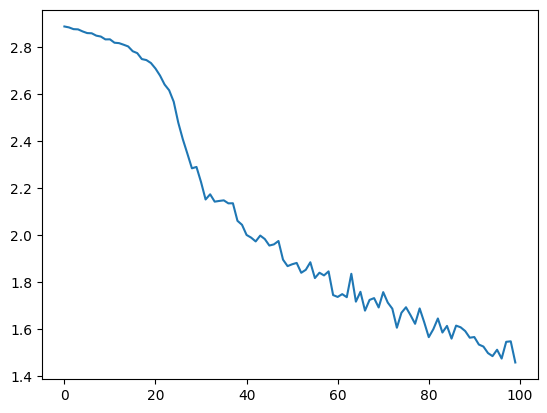

In [ ]:
n_iters = 100000
print_every = 5000

current_loss = 0
all_losses = []

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = dataset.randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, _ = dataset.categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% %.4f %s is predicted as a "%s" name, status = %s' % (iter, iter / n_iters * 100, loss, line, guess, correct))

    if iter % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

plt.figure()
plt.plot(all_losses)

## Traditional RNN Disadvantages

In this part, we aim to delve into the limitations of traditional RNNs:
1.   Recurrent computation is slow
2.   They have difficulty accessing information from many steps back.

You are provided with a simple code that helps you to give the idea better. By modifying this code, you are able to demonstrate the mentioned disadvantages, but you are also free to change the code if needed or use any dataset you want.

**Question:** Do you think using GPU instead of CPU completely solves the first problem?

Note: The main goal of this part is to help you understand these problems better. Don't be too hard to implement and delivery.

Epoch [10/100], Loss: 1.0032
Epoch [20/100], Loss: 0.8939
Epoch [30/100], Loss: 0.7861
Epoch [40/100], Loss: 0.6786
Epoch [50/100], Loss: 0.5723
Epoch [60/100], Loss: 0.4690
Epoch [70/100], Loss: 0.3719
Epoch [80/100], Loss: 0.2852
Epoch [90/100], Loss: 0.2129
Epoch [100/100], Loss: 0.1572


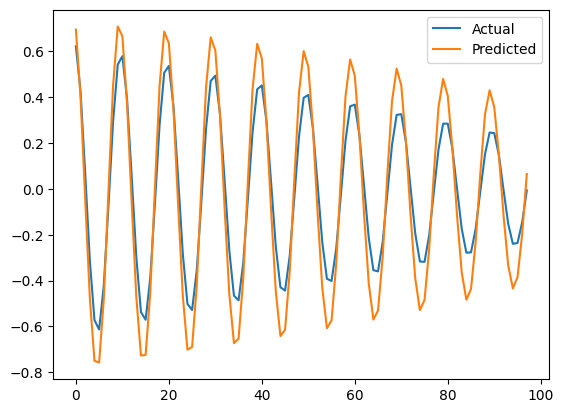

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal temperature data with decreasing range over time
np.random.seed(0)
num_periods = 50
timesteps_per_period = 10
total_timesteps = num_periods * timesteps_per_period

# Generate decreasing factor
decreasing_factor = np.linspace(1, 0.1, total_timesteps)

# Generate temperature data with decreasing sinusoidal range
temperature_data = np.sin(np.linspace(0, 2*np.pi*num_periods, total_timesteps)) * decreasing_factor

# Normalize the data
temperature_data = (temperature_data - np.mean(temperature_data)) / np.std(temperature_data)

# Convert numpy array to PyTorch tensor
temperature_data = torch.tensor(temperature_data, dtype=torch.float32).view(-1, 1)

# Define function to create dataset with sinusoidal pattern
def create_dataset(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        seq_in = data[i:i+seq_length]
        seq_out = data[i+seq_length]
        X.append(seq_in)
        Y.append(seq_out)
    return torch.stack(X), torch.stack(Y)

# Define sequence length and create dataset
sequence_length = 10  # Number of previous days to look at for prediction
X, Y = create_dataset(temperature_data, sequence_length)

# Split the dataset into train and test sets
train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters
input_size = 1
hidden_size = 10
output_size = 1

# Instantiate the model
model = SimpleRNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Plot actual vs predicted
plt.plot(Y_test.numpy(), label='Actual')
plt.plot(test_predictions.numpy(), label='Predicted')
plt.legend()
plt.show()

# LSTM Preparation

Now that you have experience with traditional RNNs, it's time to implement the LSTM model. Your goal is to implement the cell and model for LSTM architecture. The proposed dataset for this section is MNIST, allowing you to focus solely on model implementation.

In [ ]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

batch_size = 128
n_iters = 6000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

100%|██████████| 9912422/9912422 [00:00<00:00, 122891624.43it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41699034.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30301890.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4432417.12it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## LSTM Cells

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias

        self.xh = nn.Linear(input_size, hidden_size * 4, bias=bias)
        self.hh = nn.Linear(hidden_size, hidden_size * 4, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, input, hx=None):

        # Inputs:
        #       input: (batch_size, input_size)
        #       hx: (batch_size, hidden_size)
        # Outputs:
        #       hy: (batch_size, hidden_size)
        #       cy: (batch_size, hidden_size)

        if hx is None:
            hx = Variable(input.new_zeros(input.size(0), self.hidden_size))
            hx = (hx, hx)

        hx, cx = hx

        # your code
        gates = self.xh(input) + self.hh(hx)
        input_gate, forget_gate, cell_gate, output_gate = gates.chunk(4, 1)

        i_t = torch.sigmoid(input_gate)
        f_t = torch.sigmoid(forget_gate)
        g_t = torch.tanh(cell_gate)
        o_t = torch.sigmoid(output_gate)

        cy = cx * f_t + i_t * g_t
        hy = o_t * torch.tanh(cy)

        return (hy, cy)

## LSTM Models

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)

        self.fc = nn.Linear(hidden_dim, output_dim)



    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)).to(x.device)
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)).to(x.device)

        cn = c0[0,:,:]
        hn = h0[0,:,:]
        outs = []

        for seq in range(x.size(1)):
            # your code
            hn, cn = self.lstm(x[:,seq,:], (hn,cn))
            outs.append(hn)

        #your code
        out = outs[-1].squeeze()
        out = self.fc(out)

        return out

In [ ]:
input_dim = 28
hidden_dim = 128
layer_dim = 1  # ONLY 1 OR 2
output_dim = 10

# your code
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# your code

# Train model and print Loss and Accuracy on Test Dataset after each 500 iterations

best_val_loss = float('inf')
best_val_acc = 0

losses = []
iter = 0

for epoch in range(num_epochs):
    running_loss = 0.0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
      inputs, targets = inputs.view(-1, input_dim, input_dim).to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, targets)


      loss.backward()
      optimizer.step()

      # statistics
      running_loss += loss.item()

      iter += 1
      if iter % 500 == 0:
        model.eval()
        test_running_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_idx, (inputs, targets) in enumerate(test_loader):
                inputs, targets = inputs.view(-1, 28, input_dim).to(device), targets.to(device)
                outputs = model(inputs)
                test_loss = criterion(outputs, targets)

                running_loss += test_loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

        test_loss = test_running_loss / len(test_loader)
        accuracy = 100. * correct/total

        print(f'Iteration {iter} - '
          f'Test Loss: {test_loss:.7f} - '
          f'Test Accuracy: {accuracy:.4f}')


    train_loss = running_loss / len(train_loader)
    losses.append(train_loss)

Iteration 500 - Test Loss: 0.0000000 - Test Accuracy: 96.5500
Iteration 1000 - Test Loss: 0.0000000 - Test Accuracy: 98.0500
Iteration 1500 - Test Loss: 0.0000000 - Test Accuracy: 98.3900
Iteration 2000 - Test Loss: 0.0000000 - Test Accuracy: 98.0100
Iteration 2500 - Test Loss: 0.0000000 - Test Accuracy: 98.3700
Iteration 3000 - Test Loss: 0.0000000 - Test Accuracy: 98.1200
Iteration 3500 - Test Loss: 0.0000000 - Test Accuracy: 98.2600
Iteration 4000 - Test Loss: 0.0000000 - Test Accuracy: 98.5000
Iteration 4500 - Test Loss: 0.0000000 - Test Accuracy: 98.5300
Iteration 5000 - Test Loss: 0.0000000 - Test Accuracy: 98.0900
Iteration 5500 - Test Loss: 0.0000000 - Test Accuracy: 98.0300


# Sentiment Analysis

Now you are ready to face a real-world problem. In this task, we want you to do a sentiment analysis on the [IMDB dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). The main goal is to reach more than an acceptable accuracy of **75%** on LSTM model. You are free to use torch.nn.LSTM to design your architecture, but you must prepare the IMDB dataset on your own.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk, re
from nltk import word_tokenize
import string
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Retrieve IMDB dataset from kaggle

In [3]:
import json
! pip install kaggle
! mkdir -p ~/.kaggle
# create kaggale.json file
json.dump({"username":"amirezzati","key":"4d65356739140baf23a980a8b7462c9f"}, open('kaggle.json', 'w'))
! mv ./kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 97% 25.0M/25.7M [00:02<00:00, 21.8MB/s]
100% 25.7M/25.7M [00:02<00:00, 12.3MB/s]


In [5]:
!unzip ./imdb-dataset-of-50k-movie-reviews.zip

Archive:  ./imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


## Preprocessing

In [6]:
dataset = pd.read_csv('./IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
dataset['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [8]:
def encode_classes(class_):
  return 1 if class_ == 'positive' else 0

dataset['class'] = dataset['sentiment'].apply(encode_classes)

In [9]:
dataset.head()

,review,sentiment,class
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [10]:
dataset['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [11]:
# removing the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

# pipeline of cleaning the text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text

# Apply function on review column
dataset['review'] = dataset['review'].apply(denoise_text)

<ipython-input-11-eed663f1e783>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [12]:
dataset['review'][0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictur

In [13]:
pattern = r'''(?x)          # set flag to allow verbose regexps
        (?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
      | \w+(?:-\w+)*        # words with optional internal hyphens
      | \$?\d+(?:\.\d+)?%?\s?  # currency and percentages, e.g. $12.40, 82%
      | \.\.\.              # ellipsis
      | [][.,;"'?():_`-]    # these are separate tokens; includes ], [
    '''
pattern = re.compile(pattern)

def getTokenizedText(texts):
  tokenized_texts = []
  for text in texts:
    tokenized = nltk.regexp_tokenize(text, pattern)
    tokenized_texts.append(tokenized)

  return tokenized_texts

In [14]:
x = getTokenizedText(dataset['review'])

In [15]:
# this function is for some processes like stemming, lemmatization, removing punctuation, and etc.
from nltk.stem import PorterStemmer, WordNetLemmatizer

def normalize_texts(tokenized_texts, minimum_length=2,
                       stopword_removal=True, lower_case=False, punctuation_removal=True,
                       stem=False, lemmatize=False,
                       stopwords_domain=[]):
    '''
    normalization function
    '''
    normalized_texts = tokenized_texts

    if punctuation_removal:
        # Remove punctuations
        normalized_texts=[[word for word in sentence if word not in string.punctuation] for sentence in normalized_texts ]


    if stem:
      ps = PorterStemmer()
      normalized_texts = [[ps.stem(word) for word in sentence] for sentence in normalized_texts]

    if stopword_removal:
      # Remove stopwords in English and also the given domain stopwords
      stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
      normalized_texts = [[word for word in sentence if (word.lower() not in stopwords_domain + stopwords)] for sentence in normalized_texts ]

    if lemmatize:
      wordnet_lemmatizer = WordNetLemmatizer()
      normalized_texts = [[wordnet_lemmatizer(word) for word in sentence] for sentence in normalized_texts]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_texts = [[word.lower() for word in sentence if len(word)>minimum_length] for sentence in normalized_texts ]

    elif minimum_length>1:
        normalized_texts = [[word for word in sentence if len(word)>minimum_length] for sentence in normalized_texts ]

    return normalized_texts

In [17]:
x_normalized = normalize_texts(x, stem=True)
y = list(dataset['class'])

In [18]:
sum=0
for sample in x_normalized:
  sum += len(sample)

sum/len(x_normalized)

121.97698

In [19]:
from collections import Counter
from itertools import chain
import torch

corpus = Counter(list(chain.from_iterable(x_normalized)))
corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
word_idx = {w:i+1 for i,w in enumerate(corpus_)}
print(word_idx)

max_seq_length = 120
x_encoded = []
for sample in x_normalized:
  sample_encoded = [word_idx[w] for w in sample if w in word_idx.keys()]
  if len(sample_encoded) > max_seq_length:
    sample_encoded = sample_encoded[:max_seq_length]
  else:
    pad = [0 for i in range(max_seq_length-len(sample_encoded))]
    sample_encoded = sample_encoded + pad
  x_encoded.append(sample_encoded)

x = torch.tensor(x_encoded)

print(x)
print(x.shape)

{'thi': 1, 'movi': 2, 'film': 3, 'one': 4, 'like': 5, 'time': 6, 'good': 7, 'make': 8, 'get': 9, 'see': 10, 'charact': 11, 'veri': 12, 'watch': 13, 'even': 14, 'stori': 15, 'would': 16, 'onli': 17, 'realli': 18, 'scene': 19, 'show': 20, 'look': 21, 'well': 22, 'much': 23, 'end': 24, 'peopl': 25, 'great': 26, 'bad': 27, 'love': 28, 'becaus': 29, 'also': 30, 'think': 31, 'play': 32, 'first': 33, 'act': 34, 'dont': 35, 'way': 36, 'thing': 37, 'made': 38, 'could': 39, 'ani': 40, 'know': 41, 'say': 42, 'seem': 43, 'mani': 44, 'work': 45, 'want': 46, 'seen': 47, 'plot': 48, 'actor': 49, 'come': 50, 'two': 51, 'take': 52, 'never': 53, 'tri': 54, 'littl': 55, 'best': 56, 'year': 57, 'life': 58, 'ever': 59, 'doe': 60, 'give': 61, 'better': 62, 'man': 63, 'find': 64, 'still': 65, 'perform': 66, 'feel': 67, 'whi': 68, 'use': 69, 'part': 70, 'actual': 71, 'someth': 72, 'lot': 73, 'back': 74, 'interest': 75, 'director': 76, 'real': 77, 'guy': 78, 'doesnt': 79, 'didnt': 80, 'cast': 81, 'though': 82,

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(type(x_train))

torch.Size([40000, 120])
torch.Size([5000, 120])
torch.Size([5000, 120])
<class 'torch.Tensor'>


In [22]:
y_train = torch.tensor(y_train)
y_val = torch.tensor(y_val)
y_test = torch.tensor(y_test)

In [23]:
from torch.utils.data import TensorDataset, DataLoader
train_data = TensorDataset(x_train, y_train)
valid_data = TensorDataset(x_val, y_val)
test_data = TensorDataset(x_test, y_test)

batch_size = 64
trainloader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valloader = DataLoader(valid_data, shuffle=False, batch_size=batch_size)
testloader = DataLoader(train_data, shuffle=False, batch_size=batch_size)

## Sentiment model

In [66]:
from torch import nn

class SentimentNET(nn.Module):
    def __init__(self, num_words, embedding_dim= 128):
        super(SentimentNET, self).__init__()

        self.embedding = nn.Embedding(
                                      num_embeddings=num_words,
                                      embedding_dim=embedding_dim)
        self.lstm = nn.LSTM(
                            embedding_dim,
                            256,
                            num_layers = 2,
                            batch_first=True,
                             )
        self.out = nn.Linear(512, 1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        hidden, _ = self.lstm(x)

        avg_pool= torch.mean(hidden, 1)
        max_pool, index_max_pool = torch.max(hidden, 1)
        out = torch.cat((avg_pool, max_pool), 1)

        out = self.out(out)
        out = self.act(out)
        return out

In [63]:
# calculate accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()

In [64]:
def train(data_loader, model, criterion, optimizer, device):
    train_loss, train_acc = 0, 0
    model.train()

    for reviews, targets in data_loader:
        reviews, targets = reviews.to(device), targets.to(device)

        model.zero_grad()
        output = model(reviews)

        # calculate the loss and backprop
        loss = criterion(output.squeeze(), targets.float())
        loss.backward()
        train_loss += loss.item()

        train_acc += acc(output, targets)

        optimizer.step()

    total_train_loss = train_loss/len(data_loader.dataset)
    total_train_acc = train_acc/len(data_loader.dataset)

    return total_train_loss, total_train_acc

def evaluate(data_loader, model, device):
    val_loss, val_acc = 0, 0
    model.eval()

    with torch.no_grad():
        for reviews, targets in data_loader:
            reviews, targets = reviews.to(device), targets.to(device)

            output = model(reviews)
            val_loss = criterion(output.squeeze(), targets.float())

            val_loss += val_loss.item()
            accuracy = acc(output, targets)
            val_acc += accuracy

        total_val_loss = val_loss/len(data_loader.dataset)
        total_val_acc = val_acc/len(data_loader.dataset)

    return total_val_loss, total_val_acc

In [67]:
vocab_size = len(word_idx) + 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SentimentNET(vocab_size)
model.to(device)
print(model)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

SentimentNET(
  (embedding): Embedding(1001, 128)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True)
  (out): Linear(in_features=512, out_features=1, bias=True)
  (act): Sigmoid()
)


In [69]:
# Training model
for epoch in range(10):
    train_loss, train_acc = train(trainloader, model, criterion, optimizer, device)
    val_loss, val_acc = evaluate(valloader, model, device)

    print(f'epoch: {epoch}, train_loss: {train_loss}, train_accuracy: {train_acc} --- val_loss: {val_loss}, val_accuracy: {val_acc}')

epoch: 0, train_loss: 0.00656449656561017, train_accuracy: 0.801775 --- val_loss: 8.062597044045106e-05, val_accuracy: 0.8506
epoch: 1, train_loss: 0.004963179950602353, train_accuracy: 0.8634 --- val_loss: 6.24522435828112e-05, val_accuracy: 0.8598
epoch: 2, train_loss: 0.004301273058354854, train_accuracy: 0.8837 --- val_loss: 8.268506644526497e-05, val_accuracy: 0.8614
epoch: 3, train_loss: 0.0035190666168928146, train_accuracy: 0.90945 --- val_loss: 3.6572921089828014e-05, val_accuracy: 0.8606
epoch: 4, train_loss: 0.0024921371072530746, train_accuracy: 0.93885 --- val_loss: 2.498420508345589e-05, val_accuracy: 0.852
epoch: 5, train_loss: 0.0013236775130499154, train_accuracy: 0.970075 --- val_loss: 3.738288796739653e-05, val_accuracy: 0.8502
epoch: 6, train_loss: 0.0006424158472480485, train_accuracy: 0.9868 --- val_loss: 8.665454515721649e-06, val_accuracy: 0.8568
epoch: 7, train_loss: 0.0004569782561273314, train_accuracy: 0.990275 --- val_loss: 5.047337253927253e-05, val_accura

In [70]:
# result on testset
loss, accuracy = evaluate(testloader, model, device)

print(f'test_loss: {loss}, test_accuracy: {accuracy}')

test_loss: 1.6369489230783074e-07, test_accuracy: 0.9963
